In [1]:
import torch
import numpy as np
import pinot
import dgl

Using backend: pytorch


In [2]:
ds = pinot.data.esol()
_, __, norm, unnorm = pinot.data.utils.normalize(ds)
# ds = pinot.data.utils.batch(ds, 8)
ds_tr, ds_te = pinot.data.utils.split(ds, [2, 1])
ds_tr = pinot.data.utils.batch(ds_tr, len(ds_tr))
ds_te = pinot.data.utils.batch(ds_te, len(ds_te))

In [3]:
graph_kernel = pinot.inference.gp.deep_kernel.DeepKernel(
    representation=pinot.representation.Sequential(
        pinot.representation.dgl_legacy.gn(),
        [32, 'tanh', 32, 'tanh', 32, 'tanh']),
    base_kernel=pinot.inference.gp.kernels.RBF())

In [ ]:
opt = torch.optim.Adam(graph_kernel.parameters(), 1e-3)
x_tr, y_tr = ds_tr[0]
y_tr = norm(y_tr)
for _ in range(100):
    opt.zero_grad()
    loss = graph_kernel.loss(x_tr, y_tr).sum()
    loss.backward()
    print(loss)
    opt.step()

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor(1734.9148, grad_fn=<SumBackward0>)
tensor(1722.0105, grad_fn=<SumBackward0>)
tensor(1709.7837, grad_fn=<SumBackward0>)
tensor(1698.9976, grad_fn=<SumBackward0>)
tensor(1689.1614, grad_fn=<SumBackward0>)


In [5]:
x_te, y_te = ds_te[0]
mean, var = graph_kernel.mean_and_variance(x_tr, norm(y_tr), x_te)

In [6]:
torch.cholesky(var.to(dtype=torch.float64))

RuntimeError: cholesky_cpu: U(333,333) is zero, singular U.

ValueError: x and y must be the same size

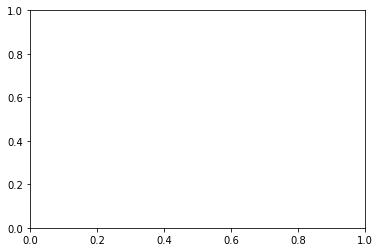

In [21]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt

plt.scatter(y_te[333:].detach().numpy(), distribution.mean.detach().numpy())

print(pinot.metrics._r2(y_te[333:].flatten(), distribution.mean))
print(pinot.metrics._rmse(y_te[333:].flatten(), distribution.mean))


In [23]:
dgl.unbatch(x_te)[332]

DGLGraph(num_nodes=12, num_edges=22,
         ndata_schemes={'type': Scheme(shape=(1,), dtype=torch.float32), 'h': Scheme(shape=(117,), dtype=torch.float32)}
         edata_schemes={})